In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
# df = pd.read_csv("lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [4]:
df["month"] = df.index.month_name()

In [5]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


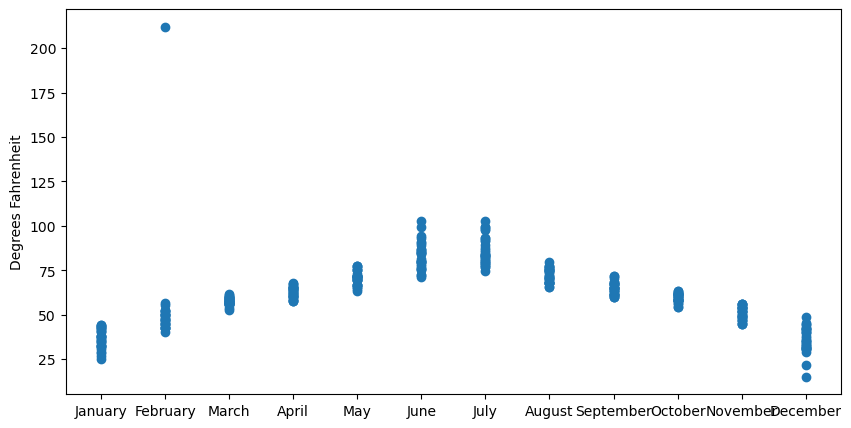

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df.month, df.Temperature)
plt.ylabel("Degrees Fahrenheit")
plt.show()

In [7]:
# Let's look at the highest temperature days
# Looks like something is going on with that temperature above 200...
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July


In [8]:
# Let's take a look at the days nearby.
df.loc["2017-02-09":"2017-02-13"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [9]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df.loc[df.Temperature == 212, "Temperature"] = df.loc["2017-02-10"].Temperature

In [10]:
# Ensure that the outlier was replaced with the previous day's temperature
df.loc["2017-02-09":"2017-02-11"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,50.0,0.91,35,0.5,21,February


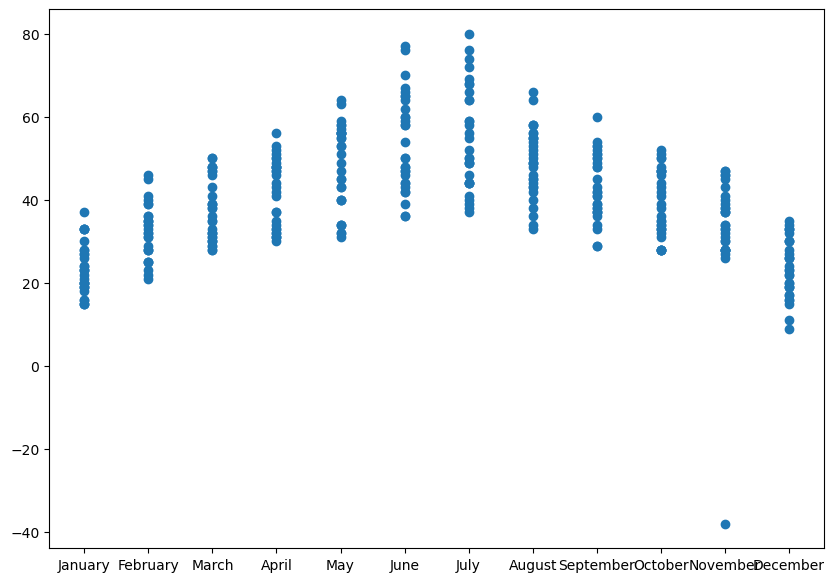

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(df.month, df.Flyers)

In [12]:
# What is the index of that negative Flyer value?
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [13]:
# Negative flyers don't make sense. Let's look at what's going on near that observation
df.loc["2017-11-19":"2017-11-23"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


In [14]:
# It looks like this negative flyer value is a simple typo
# And since the business isn't giving out a negative amount of promotional flyers, then we can take the absolute value
df.Flyers = df.Flyers.abs()
df.loc["2017-11-21"].Flyers

38

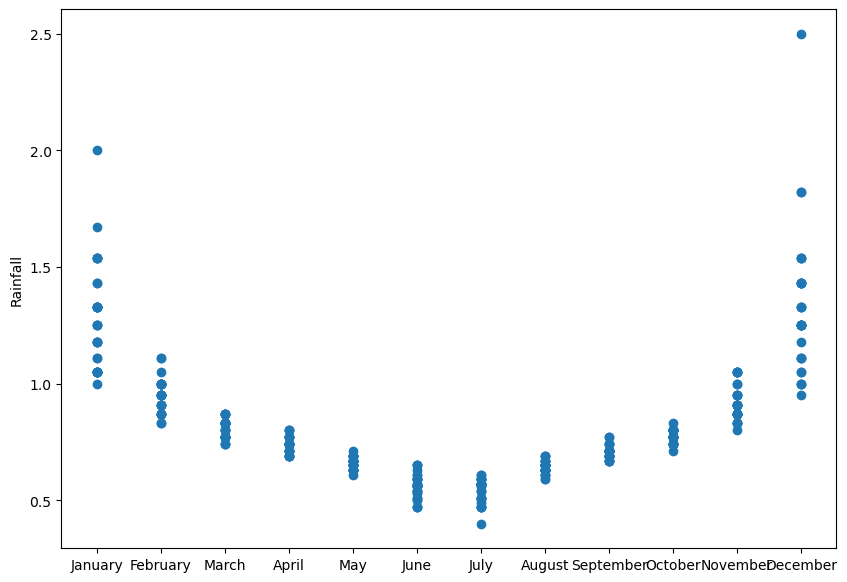

In [15]:
plt.figure(figsize=(10,7))
plt.ylabel("Rainfall")
plt.scatter(df.month, df.Rainfall)
plt.show()

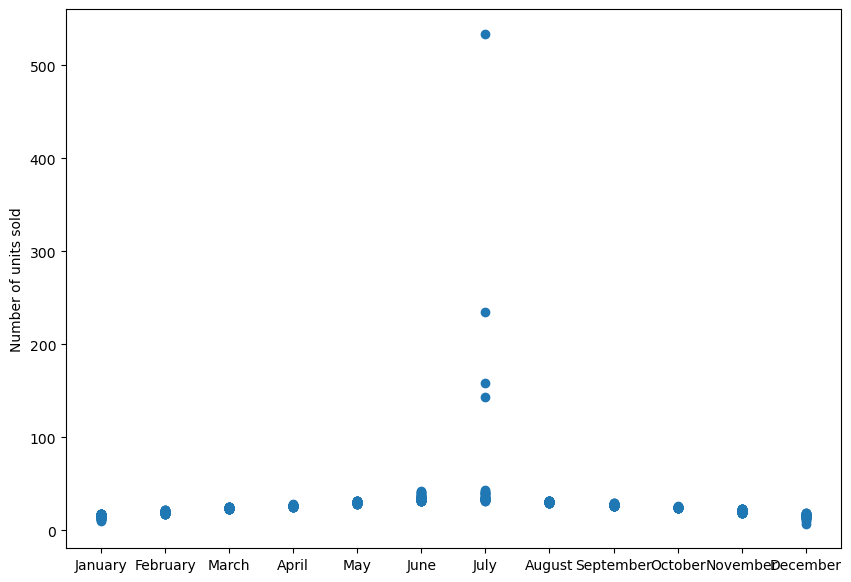

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(df.month, df.Sales)
plt.ylabel("Number of units sold")
plt.show()

In [17]:
# Let's look at the rows with high sales a little more closely
df[df.Sales > 50]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [18]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [19]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 17.30000000000001
 Upper bound for Temperature: 103.69999999999999

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [20]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [21]:
outliers

{'Temperature': {'bounds': {'upper': 103.69999999999999,
   'lower': 17.30000000000001},
  'df':                Day  Temperature  Rainfall  Flyers  Price  Sales     month
  Date                                                                     
  2017-12-31  Sunday         15.1       2.5       9    0.5      7  December},
 'Rainfall': {'bounds': {'upper': 1.3, 'lower': 0.26},
  'df':                   Day  Temperature  Rainfall  Flyers  Price  Sales     month
  Date                                                                        
  2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
  2017-01-02     Monday         28.9      1.33      15    0.5     13   January
  2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
  2017-01-06     Friday         25.3      1.54      23    0.5     11   January
  2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
  2017-01-11  Wednesday         32.6      1.54      23    0.5

In [22]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


In [23]:
outliers['Rainfall']

{'bounds': {'upper': 1.3, 'lower': 0.26},
 'df':                   Day  Temperature  Rainfall  Flyers  Price  Sales     month
 Date                                                                        
 2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
 2017-01-02     Monday         28.9      1.33      15    0.5     13   January
 2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
 2017-01-06     Friday         25.3      1.54      23    0.5     11   January
 2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
 2017-01-11  Wednesday         32.6      1.54      23    0.5     12   January
 2017-01-12   Thursday         38.2      1.33      16    0.5     14   January
 2017-01-13     Friday         37.5      1.33      19    0.5     15   January
 2017-01-16     Monday         30.6      1.67      24    0.5     12   January
 2017-01-17    Tuesday         32.2      1.43      26    0.5     14   January
 2017-01-20     

In [24]:
z_outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        if df[col].std() != 0:
            z_score = (df[col] - df[col].mean()) / df[col].std()
            print(f' z score for {col} is {z_score}\n')
            print('-----------------')
            z_outliers[col] = {}
            z_outliers[col]['z_score'] = {'z_score' : z_score}
            z_outliers[col]['df'] = df[((df[col] - df[col].mean()) / df[col].std()) > 2]
        else:
            pass
    else:
        pass

 z score for Temperature is Date
2017-01-01   -2.075945
2017-01-02   -1.959184
2017-01-03   -1.615045
2017-01-04   -1.025093
2017-01-05   -1.129564
                ...   
2017-12-27   -1.111128
2017-12-28   -1.412249
2017-12-29   -1.307778
2017-12-30   -1.836277
2017-12-31   -2.807241
Name: Temperature, Length: 365, dtype: float64

-----------------
 z score for Rainfall is Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64

-----------------
 z score for Flyers is Date
2017-01-01   -1.922928
2017-01-02   -1.922928
2017-01-03   -1.011312
2017-01-04   -0.935344
2017-01-05   -0.555503
                ...   
2017-12-27   -0.555503
2017-12-28   -0.631471
2017-12-29   -1.770992
2017-12-30   -1.391152
2017-12-31   -2.378737
Name: Flyers, Length:

In [25]:
z_outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-10,Monday,98.0,0.49,66,0.5,40,July
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July
2017-07-22,Saturday,99.6,0.47,49,0.5,42,July
2017-07-27,Thursday,97.9,0.47,74,0.5,43,July


In [26]:
df.Flyers.describe()

count    365.000000
mean      40.312329
std       13.163427
min        9.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64